# Leaukemia detection using Soft Computing Techniques


# Importing Libraries to be used

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [30]:
patients = pd.read_csv('leukemiaPatients.csv',header=None)
patients.head()

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,7129
0,1,-4,-116,-125,241,-191,-411,-31,-240,150,...,173,755,-23,573,42,987,279,22,662,-46
1,1,15,-114,2,193,-51,-155,29,-105,42,...,173,492,54,277,-13,279,51,6,2484,-2
2,1,-318,-192,-95,312,-139,-344,324,-237,105,...,225,737,63,472,33,737,227,-9,371,-31
3,1,-32,-49,49,230,-367,-508,-349,-194,34,...,36,592,57,215,-22,588,361,-26,133,-32
4,1,-124,-79,-37,330,-188,-423,-31,-223,-82,...,348,938,-15,433,-2,1170,284,39,298,-3


In [31]:
x=patients.iloc[:,1:]
y=patients.iloc[:,0]
acc=[[0]*5]*2
acc=np.zeros((2,5))
print("Shape of Feature set",x.shape)
print("Shape of target",y.shape)

Shape of Feature set (72, 7129)
Shape of target (72,)


# Train Test Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0,stratify=y)

# Scalling Features

In [33]:
sc=StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Modals

# Logistic Regression

In [34]:
logreg = LogisticRegression(solver='lbfgs',penalty='l2',class_weight='balanced',C=50)
logreg.fit(X_train, y_train)

LogisticRegression(C=50, class_weight='balanced')

In [35]:
pred_train_logreg=logreg.predict(X_train)
pred_test_logreg=logreg.predict(X_test)
print("Train set predictions:\n{}".format(pred_train_logreg))
print("Test set predictions:\n{}".format(pred_test_logreg))

Train set predictions:
[ 1 -1 -1  1 -1  1  1 -1 -1 -1  1 -1  1  1 -1  1 -1  1 -1 -1 -1 -1  1  1
 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1  1 -1
 -1 -1]
Test set predictions:
[-1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1  1 -1 -1  1  1 -1  1  1 -1]


In [36]:
print("Accuracy of Logistic Regression classifier on train set: %.2f"%accuracy_score(pred_train_logreg,y_train))
print("Accuracy of Logistic Regression classifier on test set: %.2f"%accuracy_score(pred_test_logreg,y_test))
acc[0][0]=accuracy_score(pred_train_logreg,y_train)
acc[1][0]=accuracy_score(pred_test_logreg,y_test)
print(acc)

Accuracy of Logistic Regression classifier on train set: 1.00
Accuracy of Logistic Regression classifier on test set: 0.86
[[1.         0.         0.         0.         0.        ]
 [0.86363636 0.         0.         0.         0.        ]]


In [37]:
print(confusion_matrix(y_test, pred_test_logreg))
print(classification_report(y_test, pred_test_logreg))

[[12  1]
 [ 2  7]]
              precision    recall  f1-score   support

          -1       0.86      0.92      0.89        13
           1       0.88      0.78      0.82         9

    accuracy                           0.86        22
   macro avg       0.87      0.85      0.86        22
weighted avg       0.86      0.86      0.86        22



# Principal Component Analysis

In [38]:
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Support Vector Machine

In [39]:
svm = SVC(kernel='rbf',degree=15)
svm.fit(X_train, y_train)

SVC(degree=15)

In [40]:
pred_train_svm=svm.predict(X_train)
pred_test_svm=svm.predict(X_test)
print("Train set predictions:\n{}".format(pred_train_svm))
print("Test set predictions:\n{}".format(pred_test_svm))

Train set predictions:
[ 1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1 -1  1  1
 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1  1 -1
 -1 -1]
Test set predictions:
[-1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1  1 -1 -1  1  1 -1 -1  1 -1]


In [41]:
print("Accuracy of SVM classifier on train set: %.2f"%accuracy_score(pred_train_svm,y_train))
print("Accuracy of SVM classifier on test set: %.2f"%accuracy_score(pred_test_svm,y_test))
acc[0][1]=accuracy_score(pred_train_svm,y_train)
acc[1][1]=accuracy_score(pred_test_svm,y_test)

Accuracy of SVM classifier on train set: 0.92
Accuracy of SVM classifier on test set: 0.91


In [42]:
print(confusion_matrix(y_test, pred_test_svm))
print(classification_report(y_test, pred_test_svm))

[[13  0]
 [ 2  7]]
              precision    recall  f1-score   support

          -1       0.87      1.00      0.93        13
           1       1.00      0.78      0.88         9

    accuracy                           0.91        22
   macro avg       0.93      0.89      0.90        22
weighted avg       0.92      0.91      0.91        22



# KNearestNeighbours

In [43]:
knn=KNeighborsClassifier(n_neighbors=4,p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [44]:
pred_train_knn=knn.predict(X_train)
pred_test_knn=knn.predict(X_test)
print("Train set predictions:\n{}".format(pred_train_knn))
print("Test set predictions:\n{}".format(pred_test_knn))

Train set predictions:
[ 1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1 -1 -1 -1 -1  1 -1
 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1  1 -1
 -1 -1]
Test set predictions:
[-1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1 -1 -1  1 -1]


In [45]:
print("Accuracy of KNearest Neighbour classifier on train set: %.2f"%accuracy_score(pred_train_knn,y_train))
print("Accuracy of KNearest Neighbour classifier on test set: %.2f"%accuracy_score(pred_test_knn,y_test))
acc[0][2]=accuracy_score(pred_train_knn,y_train)
acc[1][2]=accuracy_score(pred_test_knn,y_test)

Accuracy of KNearest Neighbour classifier on train set: 0.86
Accuracy of KNearest Neighbour classifier on test set: 0.86


([<matplotlib.axis.XTick at 0x7f685b03ef40>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

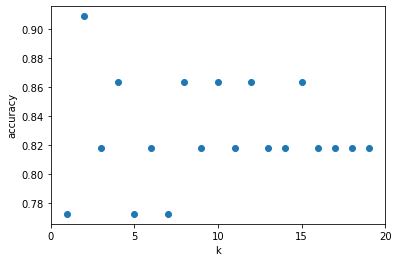

In [46]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [47]:
print(confusion_matrix(y_test, pred_test_knn))
print(classification_report(y_test, pred_test_knn))

[[13  0]
 [ 3  6]]
              precision    recall  f1-score   support

          -1       0.81      1.00      0.90        13
           1       1.00      0.67      0.80         9

    accuracy                           0.86        22
   macro avg       0.91      0.83      0.85        22
weighted avg       0.89      0.86      0.86        22



# Plotting Accuracy of Different Modals

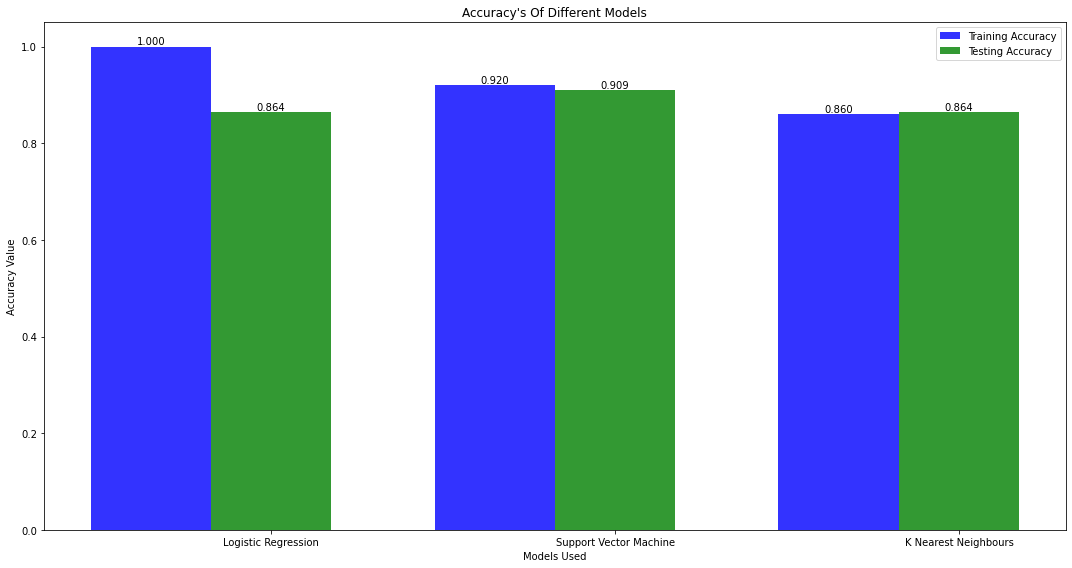

In [48]:
n_groups = 3
acc_trn = acc[0]
acc_tst = acc[1]
acc_trn=acc_trn[:-2]
acc_tst=acc_tst[:-2]
# create plot
plt.figure(figsize=(15,8))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
def display_percentage(bars):
    for graph in bars:
        height = graph.get_height()
        plt.text(graph.get_x() + graph.get_width()/2., height,'%.3f' %float(round(height,3)),ha='center', va='bottom')

train_bar = plt.bar(index, acc_trn, bar_width,alpha=opacity,color='b',label='Training Accuracy')
display_percentage(train_bar)

test_bar = plt.bar(index + bar_width, acc_tst, bar_width,alpha=opacity,color='g',label='Testing Accuracy')
display_percentage(test_bar)

plt.xlabel('Models Used')
plt.ylabel('Accuracy Value')
plt.title("Accuracy's Of Different Models")
plt.xticks(index + bar_width, ('Logistic Regression', 'Support Vector Machine', 'K Nearest Neighbours'))
plt.legend()

plt.tight_layout()
plt.show()